<a href="https://colab.research.google.com/github/Francisco2963/Proyecto-2-Parte-I-Core-ML/blob/main/Proyecto_2_Parte_I_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resultados mundiales del fútbol (1872-2024)

**Acerca del conjunto de datos**

Este conjunto de datos ofrece un registro completo de los partidos de fútbol internacionales desde el primer partido en 1872 hasta la actualidad en 2024. Abarca un amplio espectro de partidos de fútbol, ​​incluidos los principales torneos como la Copa Mundial de la FIFA y varios partidos amistosos. Con un total de 47.126 registros de partidos, este conjunto de datos es un recurso valioso para analizar tendencias históricas, rendimientos de los equipos y resultados de los partidos a lo largo de más de un siglo de fútbol internacional.

Recuperado de : https://www.kaggle.com/datasets/muhammadehsan02/global-football-results-18722024

Objetivo

Al revisar el dataset en Kaggle, este entrega una variada informacion acerca de los resultados mundiales del futbol. Abarcando una gran catidad de partidos desde los incios de este deporte.

Con esta informacion, se me ha ocurrido intentar predecir un resulado favorable para la seleccion de Chile, la primera pregunta que me hice es: ¿sera posible que las estadisticas puedan ser un factor determinante para predecir el rendimiento de un equipo de futbol en el futuro?. Si bien, las estadisticas son importantes, las estadísticas pasadas son una herramienta valiosa para analizar el fútbol, pero no deben utilizarse como única fuente de información. Es importante combinar el análisis estadístico con el conocimiento del juego y el contexto de cada partido, ademas de las condiciones ambientaes y el factor humano, este ultimo muy importante en el resultado final del partido.

Sin embargo, me he planteado este bonito desafio con el solo hecho de ver si existe la posibilidad de que un equipo de futbol como el de Chile pueda llegar a disputar una final de futbol y ganarla, solamente analizando los datos historicos presente en este conjunto de datos.

Variable objetivo y eleccion del modelo de prediccion

Para predecir cuándo Chile podría ser campeón del mundo en fútbol, es importante considerar el tipo de variable objetivo. En este caso, estaría intentando predecir un evento (Chile ganando la Copa del Mundo), lo que hace que la predicción sea un problema categórico, más que uno numérico continuo.

1.	Problema de predicción:

La pregunta principal es un problema de clasificación: "¿Cuándo Chile ganará la Copa del Mundo?". El objetivo es predecir un evento futuro categórico (ganar o no ganar el torneo).

2.	Elección del modelo:

Regresión Logística: Este es el modelo más adecuado para un problema de clasificación binaria como este. Permitiría predecir la probabilidad de que Chile gane el campeonato en un determinado año basándonos en las estadísticas pasadas.

3.	Datos relevantes: Para entrenar un modelo como este, necesitarás características clave que podrían influir en el éxito de un equipo en un torneo. Podrías usar estadísticas históricas como:

Desempeño de Chile en torneos pasados.

Estadísticas del equipo y jugadores.

Factores del torneo (ubicación, número de equipos participantes, etc.).
Desempeño en partidos clasificatorios y previos.



# EDA

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [141]:
df = pd.read_csv('/content/Goal_Scorers.csv')
df.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44362 entries, 0 to 44361
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44362 non-null  object 
 1   home_team  44362 non-null  object 
 2   away_team  44362 non-null  object 
 3   team       44362 non-null  object 
 4   scorer     44313 non-null  object 
 5   minute     44103 non-null  float64
 6   own_goal   44362 non-null  bool   
 7   penalty    44362 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


In [143]:
df['home_team'].nunique()

220

In [144]:
df['home_team'].value_counts()

,count
home_team,
Brazil,1023
Argentina,992
Germany,798
Mexico,707
France,667
...,...
Somalia,5
Yemen DPR,5
Vietnam Republic,4


In [145]:
df['own_goal'].value_counts()

,count
own_goal,
False,43541
True,821


In [146]:
df['penalty'].value_counts()

,count
penalty,
False,41400
True,2962


In [147]:
# Filtrar los registros donde penalty es True
registros_con_penalti = df[df['penalty'] == True]

# Mostrar los primeros 10 registros
registros_con_penalti.head(10)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
6,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,60.0,False,True
7,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,62.0,False,True
20,1917-09-30,Uruguay,Chile,Uruguay,Carlos Scarone,62.0,False,True
24,1917-10-03,Argentina,Brazil,Brazil,Silvio Lagreca,39.0,False,True
25,1917-10-03,Argentina,Brazil,Argentina,Alberto Ohaco,56.0,False,True
26,1917-10-03,Argentina,Brazil,Argentina,Alberto Ohaco,58.0,False,True
70,1920-09-18,Brazil,Uruguay,Uruguay,Antonio Urdinarán,26.0,False,True
99,1922-09-23,Chile,Uruguay,Uruguay,Antonio Urdinarán,19.0,False,True
112,1922-10-15,Brazil,Argentina,Brazil,Amílcar Barbuy,86.0,False,True
114,1922-10-18,Argentina,Paraguay,Argentina,Julio Francia,79.0,False,True


In [148]:
df2 = pd.read_csv('/content/Match_Results.csv')
df2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [149]:
df2['home_team'].nunique()

327

In [150]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47399 entries, 0 to 47398
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        47399 non-null  object
 1   home_team   47399 non-null  object
 2   away_team   47399 non-null  object
 3   home_score  47399 non-null  int64 
 4   away_score  47399 non-null  int64 
 5   tournament  47399 non-null  object
 6   city        47399 non-null  object
 7   country     47399 non-null  object
 8   neutral     47399 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.9+ MB


In [151]:
df2['tournament'].unique()

array(['Friendly', 'British Home Championship', 'Évence Coppée Trophy',
       'Muratti Vase', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Far Eastern Championship Games', 'Copa Roca', 'Copa América',
       'Peace Cup', 'Open International Championship',
       'Copa Chevallier Boutell', 'Olympic Games', 'Nordic Championship',
       'Central European International Cup', 'Baltic Cup', 'Balkan Cup',
       'Central American and Caribbean Games', 'FIFA World Cup',
       'Copa Rio Branco', 'FIFA World Cup qualification',
       'Bolivarian Games', 'CCCF Championship', 'NAFC Championship',
       'Copa Oswaldo Cruz', 'Asian Games', 'Pan American Championship',
       'Copa del Pacífico', "Copa Bernardo O'Higgins",
       'AFC Asian Cup qualification', 'Atlantic Cup', 'AFC Asian Cup',
       'African Cup of Nations', 'Copa Paz del Chaco',
       'Merdeka Tournament', 'UEFA Euro qualification',
       'Southeast Asian Peninsular

In [152]:
df2['tournament'].value_counts()

,count
tournament,
Friendly,17995
FIFA World Cup qualification,8169
UEFA Euro qualification,2824
African Cup of Nations qualification,2124
FIFA World Cup,964
...,...
FIFA 75th Anniversary Cup,1
TIFOCO Tournament,1
The Other Final,1


In [153]:
df3 = pd.read_csv('/content/Penalty_Shootouts.csv')
df3.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


In [154]:
df3['winner'].value_counts()

,count
winner,
Argentina,15
South Korea,15
Egypt,14
Zambia,14
Thailand,13
...,...
Corsica,1
Menorca,1
Saint Lucia,1


In [155]:
chile_wins = df3[df3['winner'] == 'Chile']
chile_wins

,date,home_team,away_team,winner,first_shooter
474,2015-07-04,Chile,Argentina,Chile,Chile
495,2016-06-26,Argentina,Chile,Chile,Chile
499,2017-01-11,Chile,Croatia,Chile,NaN
506,2017-06-28,Portugal,Chile,Chile,Chile
546,2019-06-28,Colombia,Chile,Chile,Colombia


In [156]:
df3['home_team'].nunique()

181

In [157]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           644 non-null    object
 1   home_team      644 non-null    object
 2   away_team      644 non-null    object
 3   winner         644 non-null    object
 4   first_shooter  230 non-null    object
dtypes: object(5)
memory usage: 25.3+ KB


In [158]:
df3['first_shooter'].sort_values()

,first_shooter
576,Algeria
552,Algeria
171,Argentina
36,Argentina
638,Argentina
...,...
595,NaN
612,NaN
615,NaN
616,NaN


In [159]:
df3['first_shooter'].isnull().sum()

414

COMENTARIO

EL archivo relacionado a los penales tiene muy poca informacion en relacion a los archivos de los resultados de los partidos y de los goles convertidos en los partidos.

Ademas el archivo de los penales es muy pequeño, con 644 entradas lo que deja muy atras en relacion a los otros archivos que tienen mas de 40 mil entradas, sin embargo, esta informacion es relevante ya que destaca a los ganadores de los partidos por penales

Uniremos los tres DataFrame que nos interesan y trabajremos con un solo archivo.

In [160]:
# Unir el primer y el segundo dataframe (df1 y df2) utilizando una unión externa
df_merged_1 = pd.merge(df, df2, on=['date', 'home_team', 'away_team'], how='outer')

# Unir el resultado anterior con el tercer dataframe (df3) también utilizando una unión externa
df_merged_final = pd.merge(df_merged_1, df3, on=['date', 'home_team', 'away_team'], how='outer')

# Verificar que la unión ha sido correcta mostrando la cantidad de filas y columnas
print(df_merged_final.shape)

# Mostrar los primeros registros para validar la unión
df_merged_final.head()

(77387, 16)


,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False,0.0,4.0,Copa América,Buenos Aires,Argentina,True,NaN,NaN
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False,0.0,4.0,Copa América,Buenos Aires,Argentina,True,NaN,NaN
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False,0.0,4.0,Copa América,Buenos Aires,Argentina,True,NaN,NaN
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False,0.0,4.0,Copa América,Buenos Aires,Argentina,True,NaN,NaN
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,6.0,1.0,Copa América,Buenos Aires,Argentina,False,NaN,NaN


COMENTARIO A df_marged_1.head()

Podemos ver que en los 4 registros del DataFrame concatenado los paises se repiten, al principio pense que eran valores repetidos ya que la fecha es la misma, sin embargo analizando  la informacion que muestra el DataFrame me doy cuenta que los registros son el mismo partido, lo que cambia es que pais hace el gol (columna scorer) y el minuto en que marca el gol. En el partido del 7-2-1916, Chile pierde 4 - 0 contra Uruguay y el DataFrame  muestran las entradas registrando los 4 goles del equipo uruguayo.

Este dato es importante ya que influye en la posterior tranformacion de la columna date que seguramente viene incluida la fecha y hora.

In [161]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77387 entries, 0 to 77386
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           77387 non-null  object 
 1   home_team      77387 non-null  object 
 2   away_team      77387 non-null  object 
 3   team           44362 non-null  object 
 4   scorer         44313 non-null  object 
 5   minute         44103 non-null  float64
 6   own_goal       44362 non-null  object 
 7   penalty        44362 non-null  object 
 8   home_score     77385 non-null  float64
 9   away_score     77385 non-null  float64
 10  tournament     77385 non-null  object 
 11  city           77385 non-null  object 
 12  country        77385 non-null  object 
 13  neutral        77385 non-null  object 
 14  winner         863 non-null    object 
 15  first_shooter  424 non-null    object 
dtypes: float64(3), object(13)
memory usage: 9.4+ MB


In [162]:
df_merged_final.duplicated().sum()

82

In [163]:
df_merged_final.drop_duplicates(inplace=True)

In [164]:
df_merged_final.duplicated().sum()

0

In [165]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77305 entries, 0 to 77386
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           77305 non-null  object 
 1   home_team      77305 non-null  object 
 2   away_team      77305 non-null  object 
 3   team           44280 non-null  object 
 4   scorer         44268 non-null  object 
 5   minute         44093 non-null  float64
 6   own_goal       44280 non-null  object 
 7   penalty        44280 non-null  object 
 8   home_score     77303 non-null  float64
 9   away_score     77303 non-null  float64
 10  tournament     77303 non-null  object 
 11  city           77303 non-null  object 
 12  country        77303 non-null  object 
 13  neutral        77303 non-null  object 
 14  winner         863 non-null    object 
 15  first_shooter  424 non-null    object 
dtypes: float64(3), object(13)
memory usage: 10.0+ MB


In [166]:
df_merged_final = df_merged_final.reset_index(drop=True)

In [167]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77305 entries, 0 to 77304
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           77305 non-null  object 
 1   home_team      77305 non-null  object 
 2   away_team      77305 non-null  object 
 3   team           44280 non-null  object 
 4   scorer         44268 non-null  object 
 5   minute         44093 non-null  float64
 6   own_goal       44280 non-null  object 
 7   penalty        44280 non-null  object 
 8   home_score     77303 non-null  float64
 9   away_score     77303 non-null  float64
 10  tournament     77303 non-null  object 
 11  city           77303 non-null  object 
 12  country        77303 non-null  object 
 13  neutral        77303 non-null  object 
 14  winner         863 non-null    object 
 15  first_shooter  424 non-null    object 
dtypes: float64(3), object(13)
memory usage: 9.4+ MB


In [168]:
df_merged_final['date'] = pd.to_datetime(df_merged_final['date'], errors='coerce')

In [169]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77305 entries, 0 to 77304
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           77305 non-null  datetime64[ns]
 1   home_team      77305 non-null  object        
 2   away_team      77305 non-null  object        
 3   team           44280 non-null  object        
 4   scorer         44268 non-null  object        
 5   minute         44093 non-null  float64       
 6   own_goal       44280 non-null  object        
 7   penalty        44280 non-null  object        
 8   home_score     77303 non-null  float64       
 9   away_score     77303 non-null  float64       
 10  tournament     77303 non-null  object        
 11  city           77303 non-null  object        
 12  country        77303 non-null  object        
 13  neutral        77303 non-null  object        
 14  winner         863 non-null    object        
 15  first_shooter  424 

In [170]:
df_merged_final.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False,0.0,4.0,Copa América,Buenos Aires,Argentina,True,NaN,NaN
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False,0.0,4.0,Copa América,Buenos Aires,Argentina,True,NaN,NaN
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False,0.0,4.0,Copa América,Buenos Aires,Argentina,True,NaN,NaN
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False,0.0,4.0,Copa América,Buenos Aires,Argentina,True,NaN,NaN
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,6.0,1.0,Copa América,Buenos Aires,Argentina,False,NaN,NaN


# VALORES FALTANTES o NaN

In [171]:
df_merged_final.isnull().sum()

,0
date,0
home_team,0
away_team,0
team,33025
scorer,33037
minute,33212
own_goal,33025
penalty,33025
home_score,2
away_score,2


**Columna Team**

In [172]:
# Filtrar las filas donde falta el valor en la columna 'team'
df_missing_team = df_merged_final[df_merged_final['team'].isna()]

# Verificar si las filas con valores faltantes en 'team' corresponden a empates en los goles
df_missing_team_empates = df_missing_team[df_missing_team['home_score'] == df_missing_team['away_score']]

# Ver cuántos registros con valores faltantes en 'team' corresponden a empates
print("Número de empates donde 'team' es NaN:", len(df_missing_team_empates))

# Mostrar algunas filas para verificar
df_missing_team_empates[['date', 'home_team', 'away_team', 'home_score', 'away_score', 'team']].head()

Número de empates donde 'team' es NaN: 8623


,date,home_team,away_team,home_score,away_score,team
44280,1872-11-30,Scotland,England,0.0,0.0,NaN
44283,1875-03-06,England,Scotland,2.0,2.0,NaN
44308,1883-03-17,Northern Ireland,Wales,1.0,1.0,NaN
44316,1885-03-14,England,Wales,1.0,1.0,NaN
44318,1885-03-21,England,Scotland,1.0,1.0,NaN


In [173]:
# Crear una nueva columna para indicar si el partido fue un empate (1 para empate, 0 para no empate)
df_merged_final['es_empate'] = df_merged_final.apply(
    lambda row: 1 if pd.isna(row['team']) and row['home_score'] == row['away_score'] else 0, axis=1
)

# Ahora crear otro filtro para valores NaN que NO son empates
otros_nan = df_merged_final[(df_merged_final['team'].isna()) & (df_merged_final['home_score'] != df_merged_final['away_score'])]

# Ver cuántos registros NaN no son empates
print("Número de valores NaN que NO son empates:", len(otros_nan))

# Mostrar algunos registros de estos valores NaN para análisis
otros_nan[['date', 'home_team', 'away_team', 'home_score', 'away_score', 'team']].head()

Número de valores NaN que NO son empates: 24402


,date,home_team,away_team,home_score,away_score,team
44281,1873-03-08,England,Scotland,4.0,2.0,NaN
44282,1874-03-07,Scotland,England,2.0,1.0,NaN
44284,1876-03-04,Scotland,England,3.0,0.0,NaN
44285,1876-03-25,Scotland,Wales,4.0,0.0,NaN
44286,1877-03-03,England,Scotland,1.0,3.0,NaN


In [174]:
otros_nan[['date', 'home_team', 'away_team', 'home_score', 'away_score', 'team']].tail()

,date,home_team,away_team,home_score,away_score,team
77289,2024-06-15,Colombia,Bolivia,3.0,0.0,NaN
77290,2024-06-16,Ecuador,Honduras,2.0,1.0,NaN
77291,2024-06-16,Panama,Paraguay,0.0,1.0,NaN
77303,2011-06-29,Saare County,Åland Islands,NaN,NaN,NaN
77304,2023-07-13,Åland,Falkland Islands,NaN,NaN,NaN


In [175]:
df_merged_final.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False,0.0,4.0,Copa América,Buenos Aires,Argentina,True,NaN,NaN,0
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False,0.0,4.0,Copa América,Buenos Aires,Argentina,True,NaN,NaN,0
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False,0.0,4.0,Copa América,Buenos Aires,Argentina,True,NaN,NaN,0
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False,0.0,4.0,Copa América,Buenos Aires,Argentina,True,NaN,NaN,0
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,6.0,1.0,Copa América,Buenos Aires,Argentina,False,NaN,NaN,0


In [176]:
df_merged_final['team'].isnull().sum()

33025

COMENTARIO

Tenemmos 2 salidas diferentes para los valores NaN de la columna team:

1.- Los empates que son 8623.

2.- Columnas sin empates que son 24402. Estoa registros ademas se clasificna en 3 salidas diferentes:

A.- El equipo home_team gana el partido.

B.- El equipo away_team gana el partido

C.- No hay registro de quien gano el partido

In [177]:
# Caso 1: Asignar ganador basado en home_score y away_score
# Si home_score > away_score, el equipo local es el ganador
df_merged_final.loc[(df_merged_final['team'].isna()) & (df_merged_final['home_score'] > df_merged_final['away_score']), 'team'] = df_merged_final['home_team']

# Si away_score > home_score, el equipo visitante es el ganador
df_merged_final.loc[(df_merged_final['team'].isna()) & (df_merged_final['home_score'] < df_merged_final['away_score']), 'team'] = df_merged_final['away_team']

# Caso 2: Identificar registros donde tanto home_team como away_team son NaN
registros_sin_equipos = df_merged_final[(df_merged_final['home_team'].isna()) & (df_merged_final['away_team'].isna())]

# Contar cuántos registros no tienen información de los equipos
print("Número de registros donde ambos equipos son NaN:", len(registros_sin_equipos))

# Tratamiento para estos registros sin información de equipos:
# Opción: Asignarles una etiqueta especial como "Desconocido" o decidir eliminarlos si no son útiles.
df_merged_final.loc[(df_merged_final['home_team'].isna()) & (df_merged_final['away_team'].isna()), 'team'] = 'Desconocido'

# Verificación final
print(df_merged_final['team'].isna().sum())  # Ver cuántos valores NaN quedan en 'team'
df_merged_final[['date', 'home_team', 'away_team', 'team']].head()  # Ver algunos ejemplos para revisar el resultado

Número de registros donde ambos equipos son NaN: 0
8625


,date,home_team,away_team,team
0,1916-07-02,Chile,Uruguay,Uruguay
1,1916-07-02,Chile,Uruguay,Uruguay
2,1916-07-02,Chile,Uruguay,Uruguay
3,1916-07-02,Chile,Uruguay,Uruguay
4,1916-07-06,Argentina,Chile,Argentina


In [178]:
df_merged_final['team'].isnull().sum()

8625

In [179]:
# Filtrar los registros donde team es NaN y NO son empates
registros_restantes = df_merged_final[(df_merged_final['team'].isna()) & (df_merged_final['home_score'] != df_merged_final['away_score'])]

# Mostrar los dos registros que no son empates
registros_restantes[['date', 'home_team', 'away_team', 'home_score', 'away_score', 'team', 'tournament']]

,date,home_team,away_team,home_score,away_score,team,tournament
77303,2011-06-29,Saare County,Åland Islands,NaN,NaN,NaN,NaN
77304,2023-07-13,Åland,Falkland Islands,NaN,NaN,NaN,NaN


In [180]:
# Eliminar los registros con índices 77303 y 77304
df_merged_final = df_merged_final.drop(index=[77303, 77304])

# Verificar que los registros se hayan eliminado
print("Registros restantes con NaN en la columna 'team':", df_merged_final['team'].isna().sum())

Registros restantes con NaN en la columna 'team': 8623


In [181]:
df_merged_final['team'].isnull().sum()

8623

In [182]:
# Reemplazar NaN por 'Empate' en la columna 'team'
df_merged_final['team'].fillna('Empate', inplace=True)

In [183]:
df_merged_final['team'].isnull().sum()

0

COMENTARIO COLUMNA TEAM

Esta columna identifica al equipo ganador del partido, sus valores Nan de distribuian de la siguiente forma:

1.- Equipos home_team ganadores y equipo away_team ganadores sin especificar al ganador en la columna team

2.- Dos registros de partidos sin ningun dato (eliminados)

3.- 8623 registros de partidos empatados, para esta ultima columna se creo una nueva columna indicando si es mepate.

In [184]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77303 entries, 0 to 77302
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           77303 non-null  datetime64[ns]
 1   home_team      77303 non-null  object        
 2   away_team      77303 non-null  object        
 3   team           77303 non-null  object        
 4   scorer         44268 non-null  object        
 5   minute         44093 non-null  float64       
 6   own_goal       44280 non-null  object        
 7   penalty        44280 non-null  object        
 8   home_score     77303 non-null  float64       
 9   away_score     77303 non-null  float64       
 10  tournament     77303 non-null  object        
 11  city           77303 non-null  object        
 12  country        77303 non-null  object        
 13  neutral        77303 non-null  object        
 14  winner         861 non-null    object        
 15  first_shooter  423 

**Columna scorer**

In [185]:
df_merged_final['scorer'].value_counts()

,count
scorer,
Cristiano Ronaldo,108
Robert Lewandowski,62
Romelu Lukaku,60
Harry Kane,58
Lionel Messi,55
...,...
Raimondas Vilėniškis,1
Valdas Trakys,1
Nerijus Vasiliauskas,1


In [186]:
# Identificar valores NaN en la columna 'scorer'
valores_nan = df_merged_final['scorer'].isnull()

# Ahora crear un filtro para valores NaN que NO son empates
otros_nan = df_merged_final[(df_merged_final['scorer'].isna()) & (df_merged_final['home_score'] != df_merged_final['away_score'])]
# Ver cuántos registros NaN no son empates
print("Número de valores NaN que NO son empates:", len(otros_nan))


# Mostrar las filas donde hay NaN en la columna 'scorer'
filas_con_nan = df_merged_final[valores_nan]
filas_con_nan

Número de valores NaN que NO son empates: 24411


,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
8675,1980-02-24,Vanuatu,Papua New Guinea,Papua New Guinea,NaN,NaN,False,False,3.0,4.0,Oceania Nations Cup,Nouméa,New Caledonia,True,NaN,NaN,0
8676,1980-02-24,Vanuatu,Papua New Guinea,Vanuatu,NaN,NaN,False,False,3.0,4.0,Oceania Nations Cup,Nouméa,New Caledonia,True,NaN,NaN,0
8677,1980-02-25,Fiji,Solomon Islands,Fiji,NaN,NaN,False,False,3.0,1.0,Oceania Nations Cup,Nouméa,New Caledonia,True,NaN,NaN,0
8678,1980-02-25,Fiji,Solomon Islands,Solomon Islands,NaN,NaN,False,False,3.0,1.0,Oceania Nations Cup,Nouméa,New Caledonia,True,NaN,NaN,0
8691,1980-02-26,New Caledonia,Vanuatu,New Caledonia,NaN,NaN,False,False,4.0,3.0,Oceania Nations Cup,Nouméa,New Caledonia,False,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77298,2024-06-29,Canada,Chile,Empate,NaN,NaN,NaN,NaN,0.0,0.0,Copa América,Orlando,United States,True,NaN,NaN,1
77299,2024-06-30,Mexico,Ecuador,Empate,NaN,NaN,NaN,NaN,0.0,0.0,Copa América,Glendale,United States,True,NaN,NaN,1
77300,2024-07-01,Portugal,Slovenia,Empate,NaN,NaN,NaN,NaN,0.0,0.0,UEFA Euro,Frankfurt,Germany,True,Portugal,Slovenia,1
77301,2024-07-05,Portugal,France,Empate,NaN,NaN,NaN,NaN,0.0,0.0,UEFA Euro,Hamburg,Germany,True,France,France,1


In [187]:
# Contar el número de valores faltantes en 'scorer'
missing_scorer_count = df_merged_final['scorer'].isna().sum()
print(f"Número de valores faltantes en 'scorer': {missing_scorer_count}")

# Contar cuántos de estos valores faltantes son empates
missing_scorer_and_empate = df_merged_final[(df_merged_final['scorer'].isna()) & (df_merged_final['home_score'] == df_merged_final['away_score'])].shape[0]
print(f"Número de valores faltantes en 'scorer' que son empates: {missing_scorer_and_empate}")

# Contar cuántos registros con 'scorer' faltante no son empates
missing_scorer_non_empate = df_merged_final[(df_merged_final['scorer'].isna()) & (df_merged_final['home_score'] != df_merged_final['away_score'])].shape[0]
print(f"Número de valores faltantes en 'scorer' que NO son empates: {missing_scorer_non_empate}")

# Mostrar algunos registros donde 'scorer' es NaN y no son empates
registros_sin_scorer_no_empate = df_merged_final[(df_merged_final['scorer'].isna()) & (df_merged_final['home_score'] != df_merged_final['away_score'])]
registros_sin_scorer_no_empate[['date', 'home_team', 'away_team', 'home_score', 'away_score', 'scorer']].head(10)



Número de valores faltantes en 'scorer': 33035
Número de valores faltantes en 'scorer' que son empates: 8624
Número de valores faltantes en 'scorer' que NO son empates: 24411


,date,home_team,away_team,home_score,away_score,scorer
8675,1980-02-24,Vanuatu,Papua New Guinea,3.0,4.0,NaN
8676,1980-02-24,Vanuatu,Papua New Guinea,3.0,4.0,NaN
8677,1980-02-25,Fiji,Solomon Islands,3.0,1.0,NaN
8678,1980-02-25,Fiji,Solomon Islands,3.0,1.0,NaN
8691,1980-02-26,New Caledonia,Vanuatu,4.0,3.0,NaN
8692,1980-02-26,New Caledonia,Vanuatu,4.0,3.0,NaN
8705,1980-02-27,Solomon Islands,Tahiti,1.0,12.0,NaN
8706,1980-02-27,Solomon Islands,Tahiti,1.0,12.0,NaN
8708,1980-02-28,New Caledonia,Papua New Guinea,8.0,0.0,NaN
8709,1980-02-29,Fiji,Tahiti,3.0,6.0,NaN


COMENTARIO COLUMNA SCORER

Esta columna esta relacionada con el jugador que marco el gol en el partido. Al tener un numero muy elevado de valores NaN, si bien podriamos relacionar a un jugador en especifico de un pais determinado y rellenar las columnas, pero esta imputacion nos tomara mucho tiempo por lo tanto imputaremos estos NaN con el valor desconocido, valor que esperemos no afecte el analisis posterior.

In [188]:
# Reemplazar NaN en 'scorer' con 'Desconocido'
df_merged_final['scorer'].fillna('Desconocido', inplace=True)

In [189]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77303 entries, 0 to 77302
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           77303 non-null  datetime64[ns]
 1   home_team      77303 non-null  object        
 2   away_team      77303 non-null  object        
 3   team           77303 non-null  object        
 4   scorer         77303 non-null  object        
 5   minute         44093 non-null  float64       
 6   own_goal       44280 non-null  object        
 7   penalty        44280 non-null  object        
 8   home_score     77303 non-null  float64       
 9   away_score     77303 non-null  float64       
 10  tournament     77303 non-null  object        
 11  city           77303 non-null  object        
 12  country        77303 non-null  object        
 13  neutral        77303 non-null  object        
 14  winner         861 non-null    object        
 15  first_shooter  423 

**Columna minute**

In [190]:
df_merged_final.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False,0.0,4.0,Copa América,Buenos Aires,Argentina,True,NaN,NaN,0
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False,0.0,4.0,Copa América,Buenos Aires,Argentina,True,NaN,NaN,0
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False,0.0,4.0,Copa América,Buenos Aires,Argentina,True,NaN,NaN,0
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False,0.0,4.0,Copa América,Buenos Aires,Argentina,True,NaN,NaN,0
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,6.0,1.0,Copa América,Buenos Aires,Argentina,False,NaN,NaN,0


In [191]:
# Identificar valores NaN en la columna 'minute'
valores_nan_minute = df_merged_final['minute'].isnull()
# Mostrar las filas donde hay NaN en la columna 'scorer'
filas_con_nan_minute = df_merged_final[valores_nan]
filas_con_nan_minute

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
8675,1980-02-24,Vanuatu,Papua New Guinea,Papua New Guinea,Desconocido,NaN,False,False,3.0,4.0,Oceania Nations Cup,Nouméa,New Caledonia,True,NaN,NaN,0
8676,1980-02-24,Vanuatu,Papua New Guinea,Vanuatu,Desconocido,NaN,False,False,3.0,4.0,Oceania Nations Cup,Nouméa,New Caledonia,True,NaN,NaN,0
8677,1980-02-25,Fiji,Solomon Islands,Fiji,Desconocido,NaN,False,False,3.0,1.0,Oceania Nations Cup,Nouméa,New Caledonia,True,NaN,NaN,0
8678,1980-02-25,Fiji,Solomon Islands,Solomon Islands,Desconocido,NaN,False,False,3.0,1.0,Oceania Nations Cup,Nouméa,New Caledonia,True,NaN,NaN,0
8691,1980-02-26,New Caledonia,Vanuatu,New Caledonia,Desconocido,NaN,False,False,4.0,3.0,Oceania Nations Cup,Nouméa,New Caledonia,False,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77298,2024-06-29,Canada,Chile,Empate,Desconocido,NaN,NaN,NaN,0.0,0.0,Copa América,Orlando,United States,True,NaN,NaN,1
77299,2024-06-30,Mexico,Ecuador,Empate,Desconocido,NaN,NaN,NaN,0.0,0.0,Copa América,Glendale,United States,True,NaN,NaN,1
77300,2024-07-01,Portugal,Slovenia,Empate,Desconocido,NaN,NaN,NaN,0.0,0.0,UEFA Euro,Frankfurt,Germany,True,Portugal,Slovenia,1
77301,2024-07-05,Portugal,France,Empate,Desconocido,NaN,NaN,NaN,0.0,0.0,UEFA Euro,Hamburg,Germany,True,France,France,1


In [192]:
# Contar el número de valores faltantes en 'minute'
numeros_faltantes_minute = df_merged_final['minute'].isna().sum()
print(f"Número de valores faltantes en 'minute': {numeros_faltantes_minute}")

# Contar cuántos de estos valores faltantes son empates
nuemros_faltantes_empates = df_merged_final[(df_merged_final['minute'].isna()) & (df_merged_final['home_score'] == df_merged_final['away_score'])].shape[0]
print(f"Número de valores faltantes en 'minute' que son empates: {nuemros_faltantes_empates}")

# Contar cuántos registros con 'minute' faltante no son empates
faltantes_que_no_son_empates = df_merged_final[(df_merged_final['minute'].isna()) & (df_merged_final['home_score'] != df_merged_final['away_score'])].shape[0]
print(f"Número de valores faltantes en 'minute' que NO son empates: {faltantes_que_no_son_empates}")


Número de valores faltantes en 'minute': 33210
Número de valores faltantes en 'minute' que son empates: 8636
Número de valores faltantes en 'minute' que NO son empates: 24574


In [193]:
# Mostrar algunos registros donde 'minute' es NaN y no son empates
registros_sin_minute_no_empate = df_merged_final[(df_merged_final['minute'].isna()) & (df_merged_final['home_score'] != df_merged_final['away_score'])]
registros_sin_minute_no_empate[['date', 'home_team', 'away_team', 'home_score', 'away_score', 'minute', 'team']].head(10)


,date,home_team,away_team,home_score,away_score,minute,team
3347,1960-10-16,Taiwan,Vietnam Republic,2.0,0.0,NaN,Taiwan
4059,1963-11-26,Ghana,Ethiopia,2.0,0.0,NaN,Ghana
4062,1963-11-28,Ethiopia,Tunisia,4.0,2.0,NaN,Ethiopia
4063,1963-11-28,Ethiopia,Tunisia,4.0,2.0,NaN,Ethiopia
4064,1963-11-28,Ethiopia,Tunisia,4.0,2.0,NaN,Ethiopia
4065,1963-11-28,Nigeria,Sudan,0.0,4.0,NaN,Sudan
4066,1963-11-28,Nigeria,Sudan,0.0,4.0,NaN,Sudan
4067,1963-11-28,Nigeria,Sudan,0.0,4.0,NaN,Sudan
4226,1965-03-14,Suriname,Trinidad and Tobago,6.0,1.0,NaN,Suriname
4227,1965-03-14,Suriname,Trinidad and Tobago,6.0,1.0,NaN,Trinidad and Tobago


In [194]:
# Estadísticas básicas de la columna 'minute'
df_merged_final['minute'].describe().T

,minute
count,44093.000000
mean,50.007484
std,26.356831
min,1.000000
25%,28.000000
50%,51.000000
75%,73.000000
max,122.000000


In [195]:

# Verificar la distribución de los minutos de gol
minute_distribution = df_merged_final['minute'].value_counts().head(10)
print("Distribución de minutos de gol (mostrando los 10 más frecuentes):")
print(minute_distribution)

Distribución de minutos de gol (mostrando los 10 más frecuentes):
minute
90.0    1791
45.0     922
89.0     689
75.0     616
88.0     613
85.0     612
65.0     589
80.0     587
55.0     578
83.0     557
Name: count, dtype: int64


In [196]:
# Filtrar los empates
empates = df_merged_final[df_merged_final['home_score'] == df_merged_final['away_score']]

# Contar cuántos de estos empates fueron partidos sin goles
empates_sin_goles = empates[(empates['home_score'] == 0) & (empates['away_score'] == 0)]

# Número de empates sin goles
num_empates_sin_goles = empates_sin_goles.shape[0]
print(f"Número de empates sin goles: {num_empates_sin_goles}")

# Número total de empates
num_empates = empates.shape[0]
print(f"Número total de empates: {num_empates}")

Número de empates sin goles: 3798
Número total de empates: 14389


In [197]:
df_merged_final['minute'].value_counts()

,count
minute,
90.0,1791
45.0,922
89.0,689
75.0,616
88.0,613
...,...
96.0,4
106.0,4
113.0,3


In [198]:
df_merged_final['minute'].unique()

array([ 44.,  55.,  70.,  75.,   2.,  60.,  62.,  67.,  81.,  29.,  85.,
        10.,  23.,   8.,  58.,  77.,  20.,  15.,  39.,  56.,  80.,  76.,
        17.,  86.,  21.,  26.,  41.,  59.,  19.,  38.,  79.,  83.,  34.,
        31.,  43.,  22.,  57.,  65.,  13.,  33.,  63., 122.,  53.,  48.,
        30.,  40.,  73.,  37.,  27.,   9.,  66.,  46.,   1.,  71.,  14.,
        36.,   5.,  78.,   7.,  42.,  11.,  89.,  18.,  49.,  87.,  28.,
        88.,  64.,  74.,  82.,  84.,  50.,  68.,  51.,  35.,  61.,  25.,
        32.,  52.,  69.,   4.,  24.,  12., 104.,  47.,   6.,  72.,  16.,
         3.,  90.,  54.,  45.,  93., 109., 116.,  95., 102., 112., 118.,
       103., 105., 111.,  94., 114.,  91.,  97., 113.,  nan, 101., 107.,
       110.,  96., 120., 100., 108., 117.,  98.,  92., 115., 119., 106.,
        99.])

In [199]:
# Imputar los valores NaN con 0 para partidos sin goles
df_merged_final.loc[(df_merged_final['home_score'] == 0) &
                    (df_merged_final['away_score'] == 0) &
                    df_merged_final['minute'].isna(), 'minute'] = 0


print(df_merged_final[df_merged_final['minute'] == 0].shape[0])
print(df_merged_final['minute'].isna().sum())

3798
29412


COMENTARIO

Imputamos los registros que son empate sin goles y como es una columna numerica cambiamos todos los NaN de empates sin goles por un 0.

Ahora quedan 29412 registros NaN de los cuales algunos son empates, el problema de esta imputacion es que las filas no son unicas, es decir, por ejemplo para un partido donde el resultado es 3 a 1, hay 4 filas para este mismo partido y no tienen los registros del minuto de los goles anotados. Analizaremos la columna y veremos como imputar esos valores NaN

In [200]:
import numpy as np

COMENTARIO

imputar los valores faltanes, con una función y un bucle, por ejemplo, sabemos que los partidos duran 90 minutos ( cuando no hay alarges, son muy comunes en la copa del mundo y en torneos de copas cuando hay empates en los 90 minutos), entonces si un partido termino 4 a 0 ( ejemplo del partido entre  Chile vs Uruguay del 2-7-1916, se puede imputar esos 4 registros con un valor promedio  entre los cuartiles del dataset, por ejemplo el primer gol a los 3 minutos, el segundo a los 25, el tercero a los 55 y el cuarto a los 86 minutos de juego. Se puede hacer una función de estas características para los valores NaN faltante, incluyendo los empates con goles.

In [201]:
def imputar_minutos_nueva(grupo):
    # Filtrar solo los registros donde el equipo tiene un marcador
    goles_local = int(grupo['home_score'].values[0])  # Asegurar que sea un entero
    goles_visitante = int(grupo['away_score'].values[0])  # Asegurar que sea un entero
    total_goles = goles_local + goles_visitante

    # Crear una lista de minutos para los goles
    minutos = []
    for i in range(total_goles):
        # Asignar minutos aleatorios para los goles del equipo local o visitante
        minutos.append(np.random.randint(1, 91))  # Aleatorio entre 1 y 90

    # Imputar los NaN en minute
    for idx in range(len(grupo)):
        if pd.isna(grupo.iloc[idx]['minute']):
            grupo.iloc[idx, grupo.columns.get_loc('minute')] = minutos.pop(0) if minutos else 90

    return grupo

In [202]:
df_merged_final = df_merged_final.groupby(['date', 'home_team', 'away_team']).apply(imputar_minutos_nueva)

# Verificar cuántos NaN quedan en 'minute'
print(df_merged_final['minute'].isna().sum())

0


In [203]:
df_merged_final.isnull().sum()

,0
date,0
home_team,0
away_team,0
team,0
scorer,0
minute,0
own_goal,33023
penalty,33023
home_score,0
away_score,0


In [204]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 77303 entries, (Timestamp('1872-11-30 00:00:00'), 'Scotland', 'England', 44280) to (Timestamp('2024-07-14 00:00:00'), 'Spain', 'England', 44279)
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           77303 non-null  datetime64[ns]
 1   home_team      77303 non-null  object        
 2   away_team      77303 non-null  object        
 3   team           77303 non-null  object        
 4   scorer         77303 non-null  object        
 5   minute         77303 non-null  float64       
 6   own_goal       44280 non-null  object        
 7   penalty        44280 non-null  object        
 8   home_score     77303 non-null  float64       
 9   away_score     77303 non-null  float64       
 10  tournament     77303 non-null  object        
 11  city           77303 non-null  object        
 12  country        77303 non-null  object        
 13  ne

In [205]:
# Resetear el MultiIndex a un índice simple sin reintegrar las columnas de los índices
df_merged_final = df_merged_final.reset_index(drop=True)

# Verificar la estructura del DataFrame
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77303 entries, 0 to 77302
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           77303 non-null  datetime64[ns]
 1   home_team      77303 non-null  object        
 2   away_team      77303 non-null  object        
 3   team           77303 non-null  object        
 4   scorer         77303 non-null  object        
 5   minute         77303 non-null  float64       
 6   own_goal       44280 non-null  object        
 7   penalty        44280 non-null  object        
 8   home_score     77303 non-null  float64       
 9   away_score     77303 non-null  float64       
 10  tournament     77303 non-null  object        
 11  city           77303 non-null  object        
 12  country        77303 non-null  object        
 13  neutral        77303 non-null  object        
 14  winner         861 non-null    object        
 15  first_shooter  423 

**Columna oun_goal**

In [206]:
df_merged_final.head(10)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
0,1872-11-30,Scotland,England,Empate,Desconocido,0.0,NaN,NaN,0.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,1
1,1873-03-08,England,Scotland,England,Desconocido,90.0,NaN,NaN,4.0,2.0,Friendly,London,England,False,NaN,NaN,0
2,1874-03-07,Scotland,England,Scotland,Desconocido,76.0,NaN,NaN,2.0,1.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0
3,1875-03-06,England,Scotland,Empate,Desconocido,56.0,NaN,NaN,2.0,2.0,Friendly,London,England,False,NaN,NaN,1
4,1876-03-04,Scotland,England,Scotland,Desconocido,59.0,NaN,NaN,3.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0
5,1876-03-25,Scotland,Wales,Scotland,Desconocido,69.0,NaN,NaN,4.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0
6,1877-03-03,England,Scotland,Scotland,Desconocido,64.0,NaN,NaN,1.0,3.0,Friendly,London,England,False,NaN,NaN,0
7,1877-03-05,Wales,Scotland,Scotland,Desconocido,36.0,NaN,NaN,0.0,2.0,Friendly,Wrexham,Wales,False,NaN,NaN,0
8,1878-03-02,Scotland,England,Scotland,Desconocido,44.0,NaN,NaN,7.0,2.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0
9,1878-03-23,Scotland,Wales,Scotland,Desconocido,14.0,NaN,NaN,9.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0


In [207]:
df_merged_final['own_goal'].value_counts()

,count
own_goal,
False,43459
True,821


In [208]:
def imputar_own_goal_empate(row):
    # Verificar si hay un valor NaN en 'own_goal'
    if pd.isna(row['own_goal']):
        # Comprobar si es un empate sin goles
        if row['home_score'] == 0 and row['away_score'] == 0:
            return False  # Imputar False para empates 0-0
    return row['own_goal']  # Retornar el valor original si no es NaN

# Aplicar la función a la columna
df_merged_final['own_goal'] = df_merged_final.apply(imputar_own_goal_empate, axis=1)

# Verificar cuántos NaN quedan en 'own_goal'
print(df_merged_final['own_goal'].isna().sum())

29225


In [209]:
df_merged_final.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
0,1872-11-30,Scotland,England,Empate,Desconocido,0.0,False,NaN,0.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,1
1,1873-03-08,England,Scotland,England,Desconocido,90.0,NaN,NaN,4.0,2.0,Friendly,London,England,False,NaN,NaN,0
2,1874-03-07,Scotland,England,Scotland,Desconocido,76.0,NaN,NaN,2.0,1.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0
3,1875-03-06,England,Scotland,Empate,Desconocido,56.0,NaN,NaN,2.0,2.0,Friendly,London,England,False,NaN,NaN,1
4,1876-03-04,Scotland,England,Scotland,Desconocido,59.0,NaN,NaN,3.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0


In [210]:
df_merged_final['own_goal'].value_counts()

,count
own_goal,
False,47257
True,821


COMENTARIO

No fue posible establecer para los 29225 NaN de la columna own_goal si alguno de los goles anotados eran autogoles, por tal motvo aplicaremos una funcion en base a los partidos mayores a 4 goles en los cuales pueda haber una posibilidad de que alguno de esos goles sea un autogol.

In [211]:
def imputar_own_goal_goles(row):
    # Si el valor de 'own_goal' es NaN y hay goles en el partido
    if pd.isna(row['own_goal']) and (row['home_score'] > 0 or row['away_score'] > 0):
        # Regla: Si la diferencia de goles es grande (e.g., >= 4), es probable que haya un autogol
        if abs(row['home_score'] - row['away_score']) >= 4:
            return np.random.choice([True, False], p=[0.7, 0.3])  # Imputar probabilísticamente
        # Si el partido fue más cerrado, asumir que no hubo autogol
        return False
    return row['own_goal']

# Aplicar la función a la columna 'own_goal'
df_merged_final['own_goal'] = df_merged_final.apply(imputar_own_goal_goles, axis=1)

# Verificar cuántos NaN quedan en 'own_goal'
print(df_merged_final['own_goal'].isna().sum())


0


In [212]:
df_merged_final['own_goal'].value_counts()

,count
own_goal,
False,73847
True,3456


In [213]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77303 entries, 0 to 77302
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           77303 non-null  datetime64[ns]
 1   home_team      77303 non-null  object        
 2   away_team      77303 non-null  object        
 3   team           77303 non-null  object        
 4   scorer         77303 non-null  object        
 5   minute         77303 non-null  float64       
 6   own_goal       77303 non-null  bool          
 7   penalty        44280 non-null  object        
 8   home_score     77303 non-null  float64       
 9   away_score     77303 non-null  float64       
 10  tournament     77303 non-null  object        
 11  city           77303 non-null  object        
 12  country        77303 non-null  object        
 13  neutral        77303 non-null  object        
 14  winner         861 non-null    object        
 15  first_shooter  423 

**Columna Penalty**

In [214]:
df_merged_final['penalty'].value_counts()

,count
penalty,
False,41318
True,2962


COMENTARIO

Ocuparemos la misma estrategia que para la columna anterior (tienen los mismos valores NaN).

In [215]:
def imputar_penalty_empate(row):
    # Verificar si hay un valor NaN en 'penalty'
    if pd.isna(row['penalty']):
        # Comprobar si es un empate sin goles
        if row['home_score'] == 0 and row['away_score'] == 0:
            return False  # Imputar False para empates 0-0
    return row['penalty']  # Retornar el valor original si no es NaN

# Aplicar la función a la columna
df_merged_final['penalty'] = df_merged_final.apply(imputar_penalty_empate, axis=1)

# Verificar cuántos NaN quedan en 'own_goal'
print(df_merged_final['penalty'].isna().sum())

29225


In [216]:
# Filtrar los registros donde penalty es True
registros_con_penalti = df_merged_final[df_merged_final['penalty'] == True]

# Mostrar los primeros 10 registros
registros_con_penalti.head(7)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
469,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,60.0,False,True,6.0,1.0,Copa América,Buenos Aires,Argentina,False,NaN,NaN,0
470,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,62.0,False,True,6.0,1.0,Copa América,Buenos Aires,Argentina,False,NaN,NaN,0
513,1917-09-30,Uruguay,Chile,Uruguay,Carlos Scarone,62.0,False,True,4.0,0.0,Copa América,Montevideo,Uruguay,False,NaN,NaN,0
517,1917-10-03,Argentina,Brazil,Brazil,Silvio Lagreca,39.0,False,True,4.0,2.0,Copa América,Montevideo,Uruguay,True,NaN,NaN,0
518,1917-10-03,Argentina,Brazil,Argentina,Alberto Ohaco,56.0,False,True,4.0,2.0,Copa América,Montevideo,Uruguay,True,NaN,NaN,0
519,1917-10-03,Argentina,Brazil,Argentina,Alberto Ohaco,58.0,False,True,4.0,2.0,Copa América,Montevideo,Uruguay,True,NaN,NaN,0
640,1920-09-18,Brazil,Uruguay,Uruguay,Antonio Urdinarán,26.0,False,True,0.0,6.0,Copa América,Viña del Mar,Chile,True,NaN,NaN,0


In [217]:
filas_especificas = df_merged_final.loc[467:473]
filas_especificas

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
467,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False,6.0,1.0,Copa América,Buenos Aires,Argentina,False,NaN,NaN,0
468,1916-07-06,Argentina,Chile,Chile,Telésforo Báez,44.0,False,False,6.0,1.0,Copa América,Buenos Aires,Argentina,False,NaN,NaN,0
469,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,60.0,False,True,6.0,1.0,Copa América,Buenos Aires,Argentina,False,NaN,NaN,0
470,1916-07-06,Argentina,Chile,Argentina,Juan Domingo Brown,62.0,False,True,6.0,1.0,Copa América,Buenos Aires,Argentina,False,NaN,NaN,0
471,1916-07-06,Argentina,Chile,Argentina,Alberto Marcovecchio,67.0,False,False,6.0,1.0,Copa América,Buenos Aires,Argentina,False,NaN,NaN,0
472,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,75.0,False,False,6.0,1.0,Copa América,Buenos Aires,Argentina,False,NaN,NaN,0
473,1916-07-06,Argentina,Chile,Argentina,Alberto Marcovecchio,81.0,False,False,6.0,1.0,Copa América,Buenos Aires,Argentina,False,NaN,NaN,0


COMENTARIO

Basados en la misma estrategia de la columna anterior y en la visualizacion de algunos partidos donde el marcador es abultado, imputaremos los valores faltantes NaN y asumiremos que alguno de los goles fue por penal cuando el marcador sea igual o mayor a 4 goles.

Elegimos esta estrategia para la columna penalty ya que no fue posible establecer por la cantidad de valores NaN, cual o cuales de estos goles fue producto de un penalty.

In [218]:
def imputar_penalty_goles(row):
    # Si el valor de 'penalty' es NaN y hay goles en el partido
    if pd.isna(row['penalty']) and (row['home_score'] > 0 or row['away_score'] > 0):
        # Regla: Si la diferencia de goles es grande (e.g., >= 4), es probable que haya un penal
        if abs(row['home_score'] - row['away_score']) >= 4:
            return np.random.choice([True, False], p=[0.7, 0.3])  # Imputar probabilísticamente
        # Si el partido fue más cerrado, asumir que no hubo autogol
        return False
    return row['penalty']

# Aplicar la función a la columna 'penalty'
df_merged_final['penalty'] = df_merged_final.apply(imputar_penalty_goles, axis=1)

# Verificar cuántos NaN quedan en 'own_goal'
print(df_merged_final['penalty'].isna().sum())

0


In [219]:
df_merged_final['penalty'].value_counts()

,count
penalty,
False,71709
True,5594


In [220]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77303 entries, 0 to 77302
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           77303 non-null  datetime64[ns]
 1   home_team      77303 non-null  object        
 2   away_team      77303 non-null  object        
 3   team           77303 non-null  object        
 4   scorer         77303 non-null  object        
 5   minute         77303 non-null  float64       
 6   own_goal       77303 non-null  bool          
 7   penalty        77303 non-null  bool          
 8   home_score     77303 non-null  float64       
 9   away_score     77303 non-null  float64       
 10  tournament     77303 non-null  object        
 11  city           77303 non-null  object        
 12  country        77303 non-null  object        
 13  neutral        77303 non-null  object        
 14  winner         861 non-null    object        
 15  first_shooter  423 

**COMENTARIO COLUNAS WINNER Y FIRST_SHOOTER**

Estas dos columnas pertenecen al tercer DataFrame , y su contenido tiene que ver con definiciones a penales de los equipos en instancias finales, pueden ser finales de torneos, semifinales, cuartos de final, etc. por lo tanto los valores verdaderos donde si existio una defincion por penales indica en la columna winner al ganador de la definicion y en la columna first_shooter quien inicio la ejecucion de los penales.

Veremos un ejemplo con el equipo de Chile que tiene algunas definiciones de este tipo.

In [221]:
chile_wins = df_merged_final[df_merged_final['winner'] == 'Chile']
chile_wins

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
62328,2015-07-04,Chile,Argentina,Empate,Desconocido,0.0,False,False,0.0,0.0,Copa América,Santiago,Chile,False,Chile,Chile,1
64237,2016-06-26,Argentina,Chile,Empate,Desconocido,0.0,False,False,0.0,0.0,Copa América,East Rutherford,United States,True,Chile,Chile,1
65100,2017-01-11,Chile,Croatia,Empate,Desconocido,13.0,False,False,1.0,1.0,Friendly,Nanning,China PR,True,Chile,NaN,1
65750,2017-06-28,Portugal,Chile,Empate,Desconocido,0.0,False,False,0.0,0.0,Confederations Cup,Kazan,Russia,True,Chile,Chile,1
68799,2019-06-28,Colombia,Chile,Empate,Desconocido,0.0,False,False,0.0,0.0,Copa América,São Paulo,Brazil,True,Chile,Colombia,1


In [222]:
filas_con_nan = df_merged_final.loc[df_merged_final['winner'].isnull()]
filas_con_nan

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
0,1872-11-30,Scotland,England,Empate,Desconocido,0.0,False,False,0.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,1
1,1873-03-08,England,Scotland,England,Desconocido,90.0,False,False,4.0,2.0,Friendly,London,England,False,NaN,NaN,0
2,1874-03-07,Scotland,England,Scotland,Desconocido,76.0,False,False,2.0,1.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0
3,1875-03-06,England,Scotland,Empate,Desconocido,56.0,False,False,2.0,2.0,Friendly,London,England,False,NaN,NaN,1
4,1876-03-04,Scotland,England,Scotland,Desconocido,59.0,False,False,3.0,0.0,Friendly,Glasgow,Scotland,False,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77294,2024-07-10,Uruguay,Colombia,Colombia,Jefferson Lerma,39.0,False,False,0.0,1.0,Copa América,Charlotte,United States,True,NaN,NaN,0
77299,2024-07-14,Argentina,Colombia,Argentina,Lautaro Martínez,112.0,False,False,1.0,0.0,Copa América,Miami Gardens,United States,True,NaN,NaN,0
77300,2024-07-14,Spain,England,Spain,Nico Williams,47.0,False,False,2.0,1.0,UEFA Euro,Berlin,Germany,True,NaN,NaN,0
77301,2024-07-14,Spain,England,England,Cole Palmer,73.0,False,False,2.0,1.0,UEFA Euro,Berlin,Germany,True,NaN,NaN,0


In [223]:
# Actualizar la columna 'winner' donde no hubo empate y no hay penales
df_merged_final.loc[(df_merged_final['es_empate'] == 0) & (df_merged_final['winner'].isna()), 'winner'] = "No hay penales"

# Verificar los cambios realizados
df_merged_final['winner'].value_counts()

,count
winner,
No hay penales,68296
Argentina,32
Brazil,21
Nigeria,19
Cameroon,17
...,...
Iraqi Kurdistan,1
County of Nice,1
Serbia,1


In [224]:
df_merged_final['winner'].sort_values()

,winner
63991,Abkhazia
68416,Abkhazia
14350,Algeria
18383,Algeria
18382,Algeria
...,...
77177,NaN
77178,NaN
77198,NaN
77226,NaN


In [225]:
df_merged_final['winner'].isnull().sum()

8146

In [226]:
# Rellenar los valores NaN con la frase "no hay penales"
df_merged_final['winner'] = df_merged_final['winner'].fillna('No hay penales')

COMENTARIO

Despues de analziar las columnas que eran empates y que tenian una alta posibilidad de que se ejecutaran penales, he decidido imputar estos valores NaN con la misma frase 'No hay penales' de los partidos donde si hubo un ganador en el tiempo reglamentario, la razon es bien siimple, el dataset original que contiene estos registros no tiene valores NaN, por lo tanto los valores NaN que se generaron al fusionar los 3 dataset son productos de partidos donde no hay definiciones a penales.

In [227]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77303 entries, 0 to 77302
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           77303 non-null  datetime64[ns]
 1   home_team      77303 non-null  object        
 2   away_team      77303 non-null  object        
 3   team           77303 non-null  object        
 4   scorer         77303 non-null  object        
 5   minute         77303 non-null  float64       
 6   own_goal       77303 non-null  bool          
 7   penalty        77303 non-null  bool          
 8   home_score     77303 non-null  float64       
 9   away_score     77303 non-null  float64       
 10  tournament     77303 non-null  object        
 11  city           77303 non-null  object        
 12  country        77303 non-null  object        
 13  neutral        77303 non-null  object        
 14  winner         77303 non-null  object        
 15  first_shooter  423 

In [228]:
df_merged_final['first_shooter'].value_counts()

,count
first_shooter,
Brazil,21
Uruguay,18
Argentina,17
Italy,16
France,16
...,...
Guatemala,1
Slovakia,1
Estonia,1


In [229]:
df_merged_final['first_shooter'].unique()

array([nan, 'Czechoslovakia', 'Argentina', 'Italy', 'France', 'Denmark',
       'Brazil', 'Germany', 'Spain', 'Sweden', 'South Korea', 'Colombia',
       'Romania', 'England', 'Russia', 'United States', 'Ivory Coast',
       'Netherlands', 'Australia', 'Nigeria', 'Mexico', 'Uruguay',
       'Tunisia', 'Iran', 'Kuwait', 'Saudi Arabia', 'Ecuador',
       'Burkina Faso', 'DR Congo', 'Belgium', 'Morocco', 'South Africa',
       'Canada', 'Cameroon', 'Republic of Ireland', 'Bahrain', 'Japan',
       'China PR', 'Panama', 'Egypt', 'Ukraine', 'Portugal', 'Croatia',
       'Zambia', 'Paraguay', 'Costa Rica', 'Gabon', 'Finland', 'Ghana',
       'Estonia', 'Equatorial Guinea', 'Chile', 'United Koreans in Japan',
       'New Zealand', 'Switzerland', 'Senegal', 'Vietnam', 'Benin',
       'Madagascar', 'Algeria', 'Tanzania', 'Bosnia and Herzegovina',
       'Scotland', 'Slovakia', 'Guatemala', 'French Guiana', 'Eswatini',
       'Mozambique', 'Qatar', 'Moldova', 'Latvia', 'Lithuania', 'Iceland',
  

In [230]:
df_merged_final.loc[df_merged_final['winner'] == 'No hay penales', 'first_shooter'] = 'No hay ganador'

In [231]:
df_merged_final.loc[df_merged_final['first_shooter'].isna() & df_merged_final['winner'].notna(), 'first_shooter'] = df_merged_final['winner']


In [232]:
df_merged_final.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
0,1872-11-30,Scotland,England,Empate,Desconocido,0.0,False,False,0.0,0.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,1
1,1873-03-08,England,Scotland,England,Desconocido,90.0,False,False,4.0,2.0,Friendly,London,England,False,No hay penales,No hay ganador,0
2,1874-03-07,Scotland,England,Scotland,Desconocido,76.0,False,False,2.0,1.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,0
3,1875-03-06,England,Scotland,Empate,Desconocido,56.0,False,False,2.0,2.0,Friendly,London,England,False,No hay penales,No hay ganador,1
4,1876-03-04,Scotland,England,Scotland,Desconocido,59.0,False,False,3.0,0.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,0


In [233]:
# Filtrar y mostrar los registros donde 'first_shooter' es Chile
chile_first_shooter = df_merged_final[df_merged_final['first_shooter'] == 'Chile']

# Mostrar los primeros registros
chile_first_shooter.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
62328,2015-07-04,Chile,Argentina,Empate,Desconocido,0.0,False,False,0.0,0.0,Copa América,Santiago,Chile,False,Chile,Chile,1
64237,2016-06-26,Argentina,Chile,Empate,Desconocido,0.0,False,False,0.0,0.0,Copa América,East Rutherford,United States,True,Chile,Chile,1
65100,2017-01-11,Chile,Croatia,Empate,Desconocido,13.0,False,False,1.0,1.0,Friendly,Nanning,China PR,True,Chile,Chile,1
65750,2017-06-28,Portugal,Chile,Empate,Desconocido,0.0,False,False,0.0,0.0,Confederations Cup,Kazan,Russia,True,Chile,Chile,1
74151,2022-06-14,Chile,Ghana,Empate,Desconocido,0.0,False,False,0.0,0.0,Kirin Cup,Suita,Japan,True,Ghana,Chile,1


In [234]:
# Filtrar y mostrar los registros donde 'first_shooter' es Chile
brasil_first_shooter = df_merged_final[df_merged_final['first_shooter'] == 'Brazil']

# Mostrar los primeros registros
brasil_first_shooter.head(21)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
23176,1986-06-21,Brazil,France,Brazil,Careca,17.0,False,False,1.0,1.0,FIFA World Cup,Guadalajara,Mexico,True,France,Brazil,0
23177,1986-06-21,Brazil,France,France,Michel Platini,40.0,False,False,1.0,1.0,FIFA World Cup,Guadalajara,Mexico,True,France,Brazil,0
28983,1993-06-27,Brazil,Argentina,Brazil,Müller,37.0,False,False,1.0,1.0,Copa América,Guayaquil,Ecuador,True,Argentina,Brazil,0
28984,1993-06-27,Brazil,Argentina,Argentina,Leonardo Rodríguez,69.0,False,False,1.0,1.0,Copa América,Guayaquil,Ecuador,True,Argentina,Brazil,0
31021,1995-07-17,Brazil,Argentina,Argentina,Abel Balbo,2.0,False,False,2.0,2.0,Copa América,Rivera,Uruguay,True,Brazil,Brazil,0
31022,1995-07-17,Brazil,Argentina,Brazil,Edmundo,9.0,False,False,2.0,2.0,Copa América,Rivera,Uruguay,True,Brazil,Brazil,0
31023,1995-07-17,Brazil,Argentina,Argentina,Gabriel Batistuta,29.0,False,False,2.0,2.0,Copa América,Rivera,Uruguay,True,Brazil,Brazil,0
31024,1995-07-17,Brazil,Argentina,Brazil,Túlio Maravilha,81.0,False,False,2.0,2.0,Copa América,Rivera,Uruguay,True,Brazil,Brazil,0
35443,1998-07-07,Brazil,Netherlands,Brazil,Ronaldo,46.0,False,False,1.0,1.0,FIFA World Cup,Marseille,France,True,Brazil,Brazil,0
35444,1998-07-07,Brazil,Netherlands,Netherlands,Patrick Kluivert,87.0,False,False,1.0,1.0,FIFA World Cup,Marseille,France,True,Brazil,Brazil,0


In [235]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77303 entries, 0 to 77302
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           77303 non-null  datetime64[ns]
 1   home_team      77303 non-null  object        
 2   away_team      77303 non-null  object        
 3   team           77303 non-null  object        
 4   scorer         77303 non-null  object        
 5   minute         77303 non-null  float64       
 6   own_goal       77303 non-null  bool          
 7   penalty        77303 non-null  bool          
 8   home_score     77303 non-null  float64       
 9   away_score     77303 non-null  float64       
 10  tournament     77303 non-null  object        
 11  city           77303 non-null  object        
 12  country        77303 non-null  object        
 13  neutral        77303 non-null  object        
 14  winner         77303 non-null  object        
 15  first_shooter  7730

In [236]:
# Corregir la columna 'es_empate' usando la columna 'winner' y los puntajes
df_merged_final['es_empate'] = df_merged_final.apply(
    lambda row: 1 if (
        (row['home_score'] == row['away_score'] and row['winner'] == 'No hay penales') or
        (row['home_score'] == row['away_score'] and pd.notna(row['winner']) and row['winner'] != 'No hay penales')
    ) else 0,
    axis=1
)

# Verificar que los valores se hayan corregido correctamente
df_merged_final['es_empate'].value_counts()

,count
es_empate,
0,62914
1,14389


In [237]:
# Filtrar y mostrar los registros donde 'first_shooter' es Chile
brasil_first_shooter = df_merged_final[df_merged_final['first_shooter'] == 'Brazil']

# Mostrar los primeros registros
brasil_first_shooter.head(21)

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
23176,1986-06-21,Brazil,France,Brazil,Careca,17.0,False,False,1.0,1.0,FIFA World Cup,Guadalajara,Mexico,True,France,Brazil,1
23177,1986-06-21,Brazil,France,France,Michel Platini,40.0,False,False,1.0,1.0,FIFA World Cup,Guadalajara,Mexico,True,France,Brazil,1
28983,1993-06-27,Brazil,Argentina,Brazil,Müller,37.0,False,False,1.0,1.0,Copa América,Guayaquil,Ecuador,True,Argentina,Brazil,1
28984,1993-06-27,Brazil,Argentina,Argentina,Leonardo Rodríguez,69.0,False,False,1.0,1.0,Copa América,Guayaquil,Ecuador,True,Argentina,Brazil,1
31021,1995-07-17,Brazil,Argentina,Argentina,Abel Balbo,2.0,False,False,2.0,2.0,Copa América,Rivera,Uruguay,True,Brazil,Brazil,1
31022,1995-07-17,Brazil,Argentina,Brazil,Edmundo,9.0,False,False,2.0,2.0,Copa América,Rivera,Uruguay,True,Brazil,Brazil,1
31023,1995-07-17,Brazil,Argentina,Argentina,Gabriel Batistuta,29.0,False,False,2.0,2.0,Copa América,Rivera,Uruguay,True,Brazil,Brazil,1
31024,1995-07-17,Brazil,Argentina,Brazil,Túlio Maravilha,81.0,False,False,2.0,2.0,Copa América,Rivera,Uruguay,True,Brazil,Brazil,1
35443,1998-07-07,Brazil,Netherlands,Brazil,Ronaldo,46.0,False,False,1.0,1.0,FIFA World Cup,Marseille,France,True,Brazil,Brazil,1
35444,1998-07-07,Brazil,Netherlands,Netherlands,Patrick Kluivert,87.0,False,False,1.0,1.0,FIFA World Cup,Marseille,France,True,Brazil,Brazil,1


In [238]:
df_merged_final.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
0,1872-11-30,Scotland,England,Empate,Desconocido,0.0,False,False,0.0,0.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,1
1,1873-03-08,England,Scotland,England,Desconocido,90.0,False,False,4.0,2.0,Friendly,London,England,False,No hay penales,No hay ganador,0
2,1874-03-07,Scotland,England,Scotland,Desconocido,76.0,False,False,2.0,1.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,0
3,1875-03-06,England,Scotland,Empate,Desconocido,56.0,False,False,2.0,2.0,Friendly,London,England,False,No hay penales,No hay ganador,1
4,1876-03-04,Scotland,England,Scotland,Desconocido,59.0,False,False,3.0,0.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,0


**COMENTARIO FINAL DE LOS VALORES NaN**

L a imputacion de los valores NaN en las diferentes columna se realziaron de diferentes formas, algunas columnas fueron imputadas con valores de desconocido, otros con un bucle de los quartiles para los goles, para la columna de autogoles y penales se adopto una estrategia de imputacion de verdadero cuando los partidos tenian mas de 4 goles, ya que en teoria algunos de esos goles podria ser un autogol o un penal, y para las ultimas columnas ( winner y first_shooter) se imputaron en base a la referncia del Dataset de penales, en el cual estaba bien definido el ganador, por lo tanto las filas con NaN no habian participado en una definicion por penales por lo tanto se opto por clasificar ese NaN como 'No hay penales' y en la columna first_shooter se opto por una estrategia similar, sin embargo esta columna se imputop en doa partes, la primera para los partidos en donde no habia una definicion por penales se imputo el NaN con el valor ' No hay ganador' y para los NaN donde si existia un ganador en la columna wimmer se opto por copiar el mimso valor de la columna winner, ya que hay un alto porcentaje en el futbol, quien patea primero un penal se lleva la victoria.

Por ultimo se corrigio la columna creada 'es empate' para que todos los valores que son empate a8independiente de la definicion por penelaes) sea considerado como un empate.


# Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).

In [239]:
df_merged_final['tournament'].value_counts()

,count
tournament,
FIFA World Cup qualification,23628
Friendly,17995
UEFA Euro qualification,8181
Copa América,2808
FIFA World Cup,2798
...,...
FIFA 75th Anniversary Cup,1
Copa Confraternidad,1
Real Madrid 75th Anniversary Cup,1


COMENTARIO

No se encontraron inconsistencias en los valores categoricos,  si bien en la columna torneo algunos campeonatos estan escritos en parte con Mayusculas, no he encontrado una explicacion en internet del porque hay esta mezcla de escrituras en los diferentes torneos, la unica explicacion relativamente logica que encontre fue un comentario en la plataforma X que dice: #RAEconsultas El uso de mayúsculas es admisible si se emplea como denominación alternativa del nombre oficial del torneo (Copa Mundial de la FIFA). Se escribirá con minúsculas siempre que se refiera estrictamente al trofeo.
recuperado de: https://x.com/RAEinforma/status/1011149426654699520

Po rlo tanto, al no encontrar literatura que justifique la forma de escritura de los torneos he decidido dejarlos tal cual.

# Identificacion de outliers

In [240]:
df_merged_final.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
0,1872-11-30,Scotland,England,Empate,Desconocido,0.0,False,False,0.0,0.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,1
1,1873-03-08,England,Scotland,England,Desconocido,90.0,False,False,4.0,2.0,Friendly,London,England,False,No hay penales,No hay ganador,0
2,1874-03-07,Scotland,England,Scotland,Desconocido,76.0,False,False,2.0,1.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,0
3,1875-03-06,England,Scotland,Empate,Desconocido,56.0,False,False,2.0,2.0,Friendly,London,England,False,No hay penales,No hay ganador,1
4,1876-03-04,Scotland,England,Scotland,Desconocido,59.0,False,False,3.0,0.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,0


In [241]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77303 entries, 0 to 77302
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           77303 non-null  datetime64[ns]
 1   home_team      77303 non-null  object        
 2   away_team      77303 non-null  object        
 3   team           77303 non-null  object        
 4   scorer         77303 non-null  object        
 5   minute         77303 non-null  float64       
 6   own_goal       77303 non-null  bool          
 7   penalty        77303 non-null  bool          
 8   home_score     77303 non-null  float64       
 9   away_score     77303 non-null  float64       
 10  tournament     77303 non-null  object        
 11  city           77303 non-null  object        
 12  country        77303 non-null  object        
 13  neutral        77303 non-null  object        
 14  winner         77303 non-null  object        
 15  first_shooter  7730

In [242]:
def calcular_outliers(df, columna):
  if df_merged_final[columna].dtype == 'object':
    return None, None, None, None
  else:

   Q1 = df_merged_final[columna].quantile(0.25)
   Q3 = df_merged_final[columna].quantile(0.75)
   IQR = Q3 - Q1
   outliers = df_merged_final[(df_merged_final[columna] < Q1 - 1.5*IQR) | (df[columna] > Q3 + 1.5*IQR)]
   return outliers, Q1, Q3, IQR

outliers_date, Q1_date, Q3_date, IQR_date = calcular_outliers(df_merged_final, 'date')
outliers_minute, Q1_minute, Q3_minute, IQR_minute = calcular_outliers(df_merged_final, 'minute')
outliers_home_score, Q1_home_score, Q3_home_score, IQR_home_score = calcular_outliers(df_merged_final, 'home_score')
outliers_away_score, Q1_away_score, Q3_away_score, IQR_away_score = calcular_outliers(df_merged_final, 'away_score')
outliers_es_empate, Q1_es_empate, Q3_es_empate, IQR_es_empate = calcular_outliers(df_merged_final, 'es_empate')


print(f'Outliers en date: \n{len(outliers_date)}')

print(f'Outliers en minute: \n{len(outliers_minute)}')

print(f'Outliers en home_score: \n{len(outliers_home_score)}')

print(f'Outliers en away_score: \n{len(outliers_away_score)}')

print(f'Outliers en es_empate: \n{len(outliers_es_empate)}')




Outliers en date: 
2513
Outliers en minute: 
0
Outliers en home_score: 
3413
Outliers en away_score: 
1939
Outliers en es_empate: 
14389


In [243]:
import matplotlib.pyplot as plt

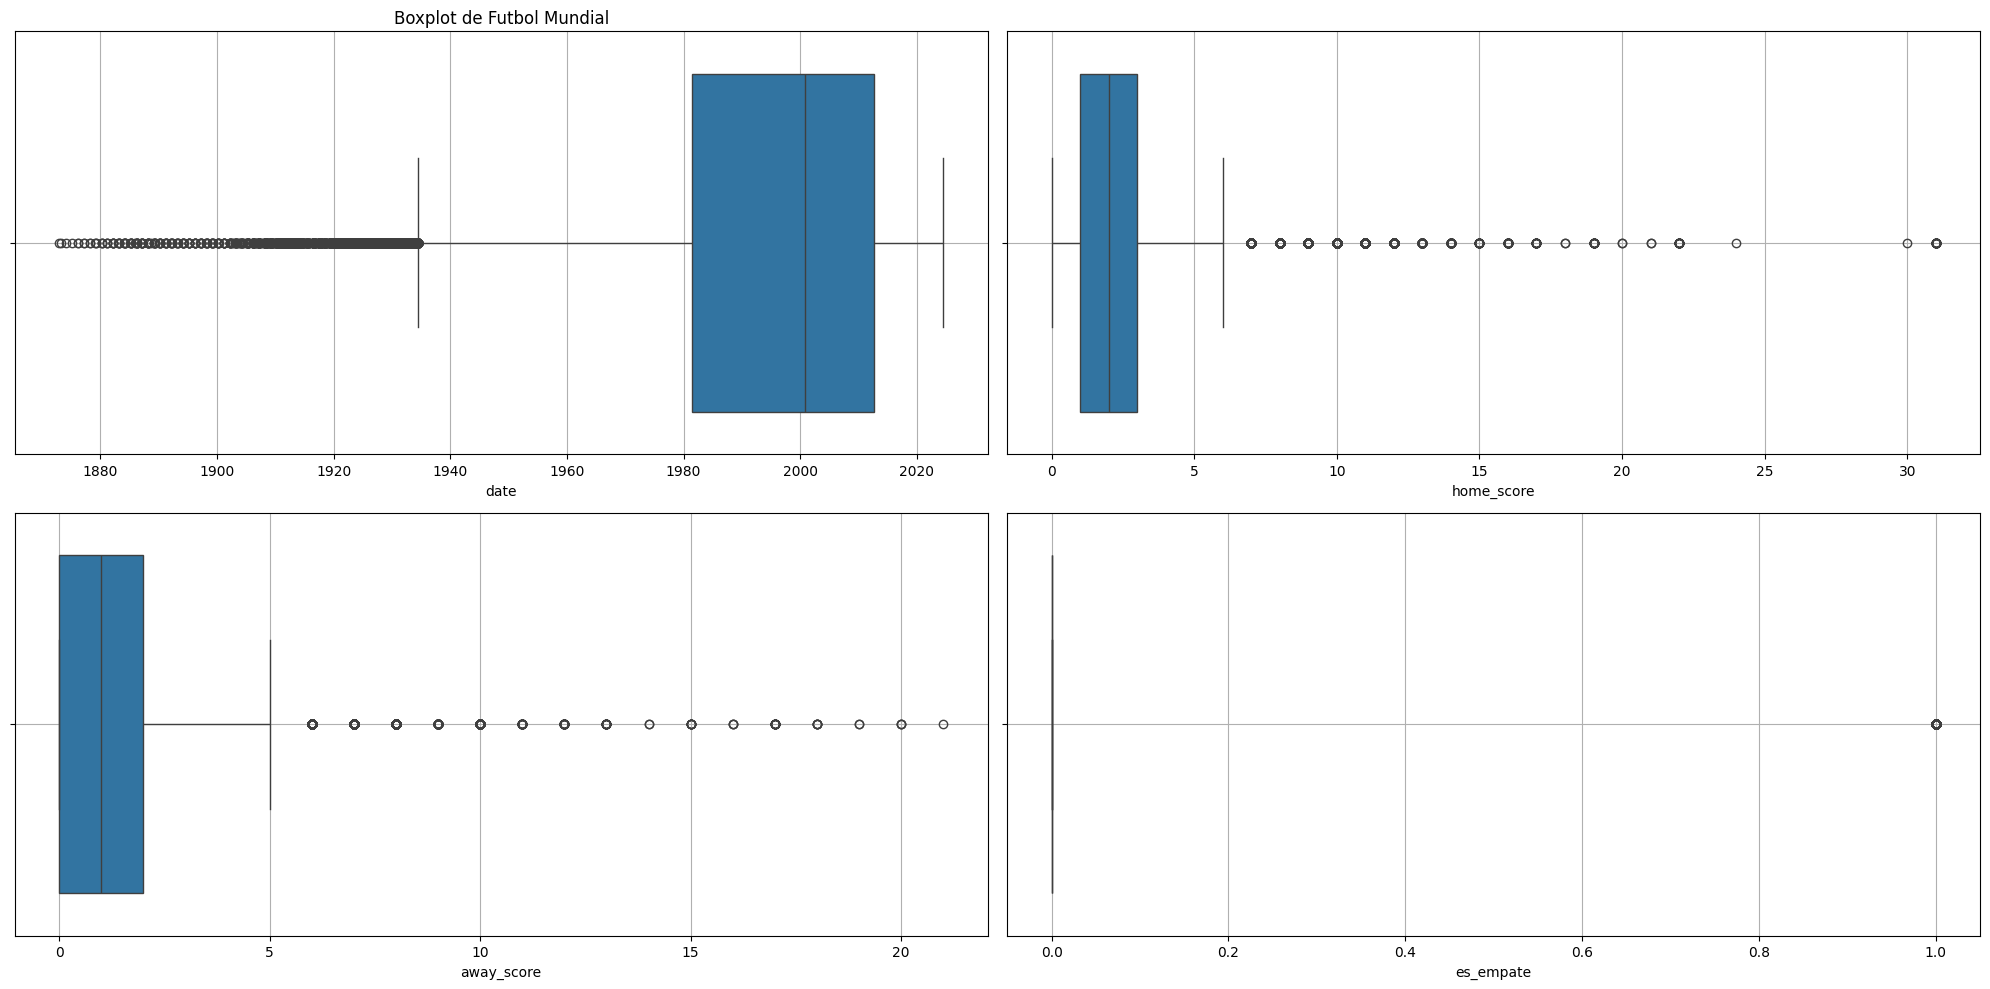

In [244]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
sns.boxplot(x=df_merged_final['date'])
plt.title('Boxplot de Futbol Mundial')
plt.xlabel('date')
plt.grid(True)

plt.subplot(2,2,2)
sns.boxplot(x=df_merged_final['home_score'])
plt.xlabel('home_score')
plt.grid(True)

plt.subplot(2,2,3)
sns.boxplot(x=df_merged_final['away_score'])
plt.xlabel('away_score')
plt.grid(True)

plt.subplot(2,2,4)
sns.boxplot(x=df_merged_final['es_empate'])
plt.xlabel('es_empate')
plt.grid(True)

plt.tight_layout()
plt.show()

In [245]:
df_merged_final['date'].dtype

dtype('<M8[ns]')

In [246]:
# Obtener una lista de los formatos únicos (si es posible)
unique_formats = df_merged_final['date'].dt.strftime('%Y-%m-%d').unique()
unique_formats

array(['1872-11-30', '1873-03-08', '1874-03-07', ..., '2024-07-10',
       '2024-07-13', '2024-07-14'], dtype=object)

In [247]:
# Calcular el IQR
Q1 = df_merged_final['date'].quantile(0.25)
Q3 = df_merged_final['date'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
# Identificar los outliers
outliers = df_merged_final[(df_merged_final['date']
 < limite_inferior) | (df_merged_final['date'] > limite_superior)]

print("Outliers:")
outliers

Outliers:


,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
0,1872-11-30,Scotland,England,Empate,Desconocido,0.0,False,False,0.0,0.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,1
1,1873-03-08,England,Scotland,England,Desconocido,90.0,False,False,4.0,2.0,Friendly,London,England,False,No hay penales,No hay ganador,0
2,1874-03-07,Scotland,England,Scotland,Desconocido,76.0,False,False,2.0,1.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,0
3,1875-03-06,England,Scotland,Empate,Desconocido,56.0,False,False,2.0,2.0,Friendly,London,England,False,No hay penales,No hay ganador,1
4,1876-03-04,Scotland,England,Scotland,Desconocido,59.0,False,False,3.0,0.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2508,1934-06-10,Italy,Czechoslovakia,Italy,Angelo Schiavio,95.0,False,False,2.0,1.0,FIFA World Cup,Rome,Italy,False,No hay penales,No hay ganador,0
2509,1934-06-10,Lithuania,Latvia,Lithuania,Desconocido,64.0,False,False,2.0,0.0,Friendly,Kaunas,Lithuania,False,No hay penales,No hay ganador,0
2510,1934-06-17,Catalonia,Brazil,Catalonia,Desconocido,55.0,False,False,2.0,1.0,Friendly,Barcelona,Spain,False,No hay penales,No hay ganador,0
2511,1934-06-17,Denmark,Sweden,Sweden,Desconocido,38.0,False,False,3.0,5.0,Nordic Championship,Copenhagen,Denmark,False,No hay penales,No hay ganador,0


COMENTARIO

Los valores outlieres no representan valores mal editados. En el caso de los goles convertidos por el local y el visitante, estos muestran que esan dentro del rango de un partido de futbol, o sea dentro de los 90 minutos de juego.

En el caso de las fechas, estan tampoco muestran u error, sino mas bien, son fechas antiguas que no estan dentro de la gran mayoria de las fechas de todos los partidos de futbol.

Por lo tanto he decidido dejar estos valores atipicos en el conjunto de datos.

# Creacion de variable objetivo

Podemos crear una variable objetivo que tenga en cuenta no solo la Copa del Mundo, sino también el rendimiento en otros torneos, como la Copa América, y cómo esos resultados podrían influir en el rendimiento futuro de Chile. Esto también puede incluir el desempeño de otros equipos como puntos de comparación.

Clasificación para la Copa del Mundo: Considerar si el equipo clasificó para el torneo como un paso importante para ganar el Mundial.

Victoria en torneos: Si Chile (o cualquier otro equipo) ha ganado algún torneo en el pasado, esto podría ser un buen indicador de fortaleza en competencias internacionales. Esto incluiría la Copa América y otros torneos relevantes.

Rendimiento acumulado: Crear una métrica de rendimiento acumulado que refleje el éxito en torneos recientes, por ejemplo, porcentaje de victorias en los últimos 5 torneos.

In [248]:
df_merged_final.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,tournament,city,country,neutral,winner,first_shooter,es_empate
0,1872-11-30,Scotland,England,Empate,Desconocido,0.0,False,False,0.0,0.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,1
1,1873-03-08,England,Scotland,England,Desconocido,90.0,False,False,4.0,2.0,Friendly,London,England,False,No hay penales,No hay ganador,0
2,1874-03-07,Scotland,England,Scotland,Desconocido,76.0,False,False,2.0,1.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,0
3,1875-03-06,England,Scotland,Empate,Desconocido,56.0,False,False,2.0,2.0,Friendly,London,England,False,No hay penales,No hay ganador,1
4,1876-03-04,Scotland,England,Scotland,Desconocido,59.0,False,False,3.0,0.0,Friendly,Glasgow,Scotland,False,No hay penales,No hay ganador,0


In [249]:
df_merged_final['tournament'].unique()

array(['Friendly', 'British Home Championship', 'Évence Coppée Trophy',
       'Muratti Vase', 'Copa Lipton', 'Copa Newton',
       'Copa Premio Honor Argentino', 'Copa Premio Honor Uruguayo',
       'Far Eastern Championship Games', 'Copa Roca', 'Copa América',
       'Peace Cup', 'Open International Championship',
       'Copa Chevallier Boutell', 'Olympic Games', 'Nordic Championship',
       'Central European International Cup', 'Baltic Cup', 'Balkan Cup',
       'Central American and Caribbean Games', 'FIFA World Cup',
       'Copa Rio Branco', 'FIFA World Cup qualification',
       'Bolivarian Games', 'CCCF Championship', 'NAFC Championship',
       'Copa Oswaldo Cruz', 'Asian Games', 'Pan American Championship',
       'Copa del Pacífico', "Copa Bernardo O'Higgins",
       'AFC Asian Cup qualification', 'Atlantic Cup', 'AFC Asian Cup',
       'African Cup of Nations', 'Copa Paz del Chaco',
       'Merdeka Tournament', 'UEFA Euro qualification',
       'Southeast Asian Peninsular

In [250]:
# Crear las 3 columnas para la variable objetivo (Copa del Mundo, Copa América, Otros Torneos)
df_merged_final['objetivo_mundial'] = df_merged_final.apply(
    lambda row: 1 if row['team'] == 'Chile' and row['tournament'] == 'FIFA World Cup' else 0, axis=1)

df_merged_final['objetivo_copa_america'] = df_merged_final.apply(
    lambda row: 1 if row['team'] == 'Chile' and row['tournament'] == 'Copa América' else 0, axis=1)

df_merged_final['objetivo_otros_torneos'] = df_merged_final.apply(
    lambda row: 1 if row['team'] == 'Chile' and row['tournament'] not in ['FIFA World Cup','Copa América'] else 0, axis=1)

# Crear la columna combinada "objetivo" que contendrá la información completa para todas las competiciones
df_merged_final['objetivo'] = df_merged_final['objetivo_mundial'] + df_merged_final['objetivo_copa_america'] + df_merged_final['objetivo_otros_torneos']

# Verificar que los valores se han asignado correctamente
df_merged_final['objetivo'].value_counts()


,count
objetivo,
0,76561
1,742


In [251]:
df_merged_final['objetivo_mundial'].value_counts()

,count
objetivo_mundial,
0,77263
1,40


In [252]:
df_merged_final['objetivo_copa_america'].value_counts()

,count
objetivo_copa_america,
0,77007
1,296


In [253]:
df_merged_final['objetivo_otros_torneos'].value_counts()

,count
objetivo_otros_torneos,
0,76897
1,406


COMENTARIO

Objetivo_mundial: Marca con 1 si Chile ganó en la Copa del Mundo, basándose en la columna team.

Objetivo_copa_america: Marca con 1 si Chile ganó en la Copa América, basándose en la columna team.

Objetivo_otros_torneos: Marca con 1 si Chile ganó en otros torneos diferentes de la Copa del Mundo y la Copa América, basándose en la columna team.

Objetivo: Suma las columnas anteriores para tener un indicador general de si Chile ganó en alguna de las competiciones. en este caso la variable objetivo generla muestra que Chile ha ganado dos torneos. La copa américa de 2015 y la Copa América Bicentenario el 2016.

In [254]:
df_merged_final.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,...,city,country,neutral,winner,first_shooter,es_empate,objetivo_mundial,objetivo_copa_america,objetivo_otros_torneos,objetivo
0,1872-11-30,Scotland,England,Empate,Desconocido,0.0,False,False,0.0,0.0,...,Glasgow,Scotland,False,No hay penales,No hay ganador,1,0,0,0,0
1,1873-03-08,England,Scotland,England,Desconocido,90.0,False,False,4.0,2.0,...,London,England,False,No hay penales,No hay ganador,0,0,0,0,0
2,1874-03-07,Scotland,England,Scotland,Desconocido,76.0,False,False,2.0,1.0,...,Glasgow,Scotland,False,No hay penales,No hay ganador,0,0,0,0,0
3,1875-03-06,England,Scotland,Empate,Desconocido,56.0,False,False,2.0,2.0,...,London,England,False,No hay penales,No hay ganador,1,0,0,0,0
4,1876-03-04,Scotland,England,Scotland,Desconocido,59.0,False,False,3.0,0.0,...,Glasgow,Scotland,False,No hay penales,No hay ganador,0,0,0,0,0


# Visualizaciones

In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
# Filtrar el DataFrame para ver las filas donde 'objetivo_mundial' es 1
objetivos_mundiales = df_merged_final[df_merged_final['objetivo_mundial'] == 1]

# Mostrar algunas de estas filas
objetivos_mundiales[['date', 'home_team', 'away_team', 'home_score', 'away_score','tournament' ,'winner']].head()

,date,home_team,away_team,home_score,away_score,tournament,winner
1871,1930-07-16,Chile,Mexico,3.0,0.0,FIFA World Cup,No hay penales
1872,1930-07-16,Chile,Mexico,3.0,0.0,FIFA World Cup,No hay penales
1873,1930-07-16,Chile,Mexico,3.0,0.0,FIFA World Cup,No hay penales
1892,1930-07-19,Chile,France,1.0,0.0,FIFA World Cup,No hay penales
1904,1930-07-22,Argentina,Chile,3.0,1.0,FIFA World Cup,No hay penales


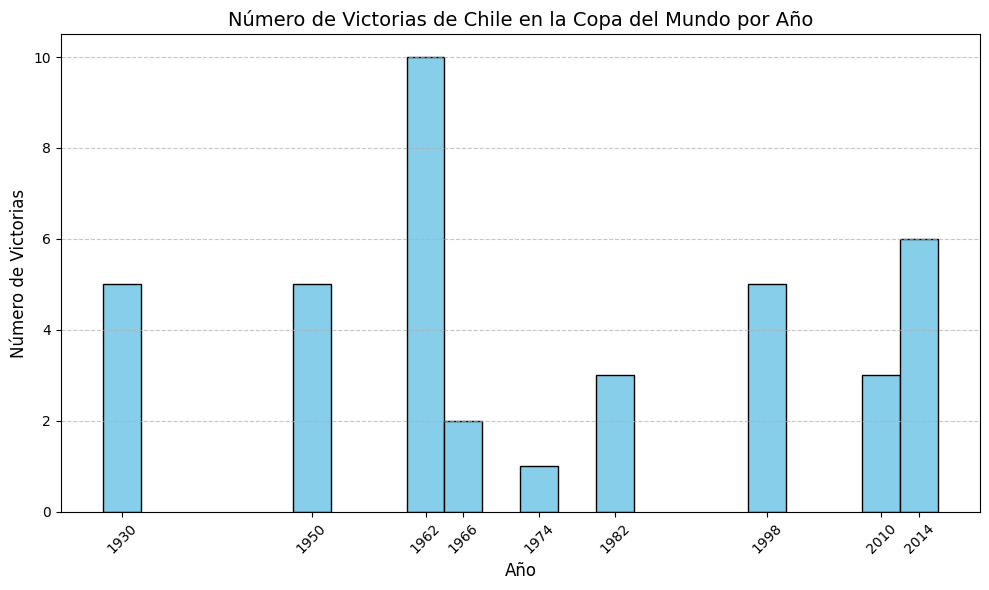

In [257]:
objetivos_mundiales = df_merged_final[df_merged_final['objetivo_mundial'] == 1].copy()

# Asegurarnos de que la columna 'date' esté en formato datetime
objetivos_mundiales['date'] = pd.to_datetime(objetivos_mundiales['date'])

# Crear una nueva columna con el año
objetivos_mundiales['year'] = objetivos_mundiales['date'].dt.year

# Contar el número de partidos ganados por Chile en el Mundial por año
victorias_por_año = objetivos_mundiales['year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(victorias_por_año.index, victorias_por_año.values, color='#87CEEB', edgecolor='black', linewidth=1, width=4)
plt.title('Número de Victorias de Chile en la Copa del Mundo por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Victorias', fontsize=12)
plt.xticks(ticks=victorias_por_año.index, labels=victorias_por_año.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

COMENTARIO DEL GRAFICO
 Podemos ver que el rendimiento de Chile en los mundiales que ha participado no es bueno,  aexcepcion del mundial de 1962 donde fue tercero, sin embargo en este mundial Chile era el amfitrion lo que influyo positivamente para que el equipo tuviera un alto rendimiento.

In [266]:
# Filtrar los datos para obtener los registros donde el torneo es "World Cup"
world_cup_data = df_merged_final[df_merged_final['tournament'] == 'FIFA World Cup']

In [269]:
chile_mundial = world_cup_data[world_cup_data['team'] == 'Chile']

# Mostrar los primeros registros
chile_mundial.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty,home_score,away_score,...,city,country,neutral,winner,first_shooter,es_empate,objetivo_mundial,objetivo_copa_america,objetivo_otros_torneos,objetivo
1871,1930-07-16,Chile,Mexico,Chile,Carlos Vidal,3.0,False,False,3.0,0.0,...,Montevideo,Uruguay,True,No hay penales,No hay ganador,0,1,0,0,1
1872,1930-07-16,Chile,Mexico,Chile,Manuel Rosas,52.0,True,False,3.0,0.0,...,Montevideo,Uruguay,True,No hay penales,No hay ganador,0,1,0,0,1
1873,1930-07-16,Chile,Mexico,Chile,Carlos Vidal,65.0,False,False,3.0,0.0,...,Montevideo,Uruguay,True,No hay penales,No hay ganador,0,1,0,0,1
1892,1930-07-19,Chile,France,Chile,Guillermo Subiabre,67.0,False,False,1.0,0.0,...,Montevideo,Uruguay,True,No hay penales,No hay ganador,0,1,0,0,1
1904,1930-07-22,Argentina,Chile,Chile,Guillermo Subiabre,15.0,False,False,3.0,1.0,...,Montevideo,Uruguay,True,No hay penales,No hay ganador,0,1,0,0,1


In [273]:

# Filtrar los registros de Chile
chile_mundial = world_cup_data[
    (world_cup_data['home_team'] == 'Chile') | (world_cup_data['away_team'] == 'Chile')
].copy()  # Hacer una copia para evitar advertencias

# Crear una nueva columna con el resultado
chile_mundial['resultado'] = chile_mundial.apply(
    lambda row: 'Victoria' if (row['home_team'] == 'Chile' and row['home_score'] > row['away_score']) or
                    (row['away_team'] == 'Chile' and row['away_score'] > row['home_score']) else
                'Empate' if row['home_score'] == row['away_score'] else 'Derrota',
    axis=1
)

# Agrupar por año y contar los resultados
rendimiento_por_mundial = chile_mundial.groupby(chile_mundial['date'].dt.year)['resultado'].value_counts().unstack().fillna(0)



<Figure size 1000x600 with 0 Axes>

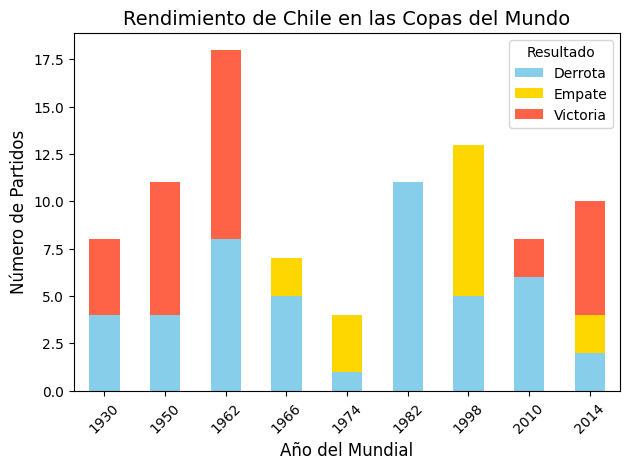

In [275]:
# Generar el gráfico
plt.figure(figsize=(10, 6))
rendimiento_por_mundial.plot(kind='bar', stacked=True, color=['#87CEEB', '#FFD700', '#FF6347'])
plt.title('Rendimiento de Chile en las Copas del Mundo', fontsize=14)
plt.xlabel('Año del Mundial', fontsize=12)
plt.ylabel('Número de Partidos', fontsize=12)
plt.legend(title='Resultado')
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

COMENTARIO DEL GRAFICO

Podemos ver que el rendimento del equipo ha bajado a medida que se van disputando mas mundiales, el grafico muestra un rendimiento en ascenso hasta el año 1962 (donde obtiene su mejor participacion), sin embargo, hay una baja en el rendimento en los posteriores mundiales, no obtenindo victorias en 4 mundiales y mejorando su participacion en los ultimos dos mundiales, sin mebargo este rendimento sigue siendo bajo.

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [276]:
df_merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77303 entries, 0 to 77302
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    77303 non-null  datetime64[ns]
 1   home_team               77303 non-null  object        
 2   away_team               77303 non-null  object        
 3   team                    77303 non-null  object        
 4   scorer                  77303 non-null  object        
 5   minute                  77303 non-null  float64       
 6   own_goal                77303 non-null  bool          
 7   penalty                 77303 non-null  bool          
 8   home_score              77303 non-null  float64       
 9   away_score              77303 non-null  float64       
 10  tournament              77303 non-null  object        
 11  city                    77303 non-null  object        
 12  country                 77303 non-null  object

In [278]:
correlation_matrix = df_merged_final[["date","minute","own_goal","penalty","home_score","away_score",
                                      "es_empate","objetivo_mundial","objetivo_copa_america",
                                      "objetivo_otros_torneos","objetivo"]].corr(method='pearson')

print('\nCorrelación de Pearson: ')
print(correlation_matrix)


Correlación de Pearson: 
                            date    minute  own_goal   penalty  home_score  \
date                    1.000000  0.021854 -0.049369 -0.009466   -0.079178   
minute                  0.021854  1.000000  0.002915  0.028486    0.090909   
own_goal               -0.049369  0.002915  1.000000  0.383395    0.156158   
penalty                -0.009466  0.028486  0.383395  1.000000    0.136230   
home_score             -0.079178  0.090909  0.156158  0.136230    1.000000   
away_score             -0.068771  0.082832  0.055202  0.051861   -0.254956   
es_empate               0.029311 -0.182065 -0.085767 -0.073537   -0.241516   
objetivo_mundial       -0.018558  0.002531 -0.002170  0.000231    0.001435   
objetivo_copa_america  -0.065282  0.006275 -0.009358 -0.005190    0.022726   
objetivo_otros_torneos  0.004242  0.005140 -0.006193 -0.005098    0.003518   
objetivo               -0.042536  0.008375 -0.011025 -0.007013    0.017338   

                        away_score  e

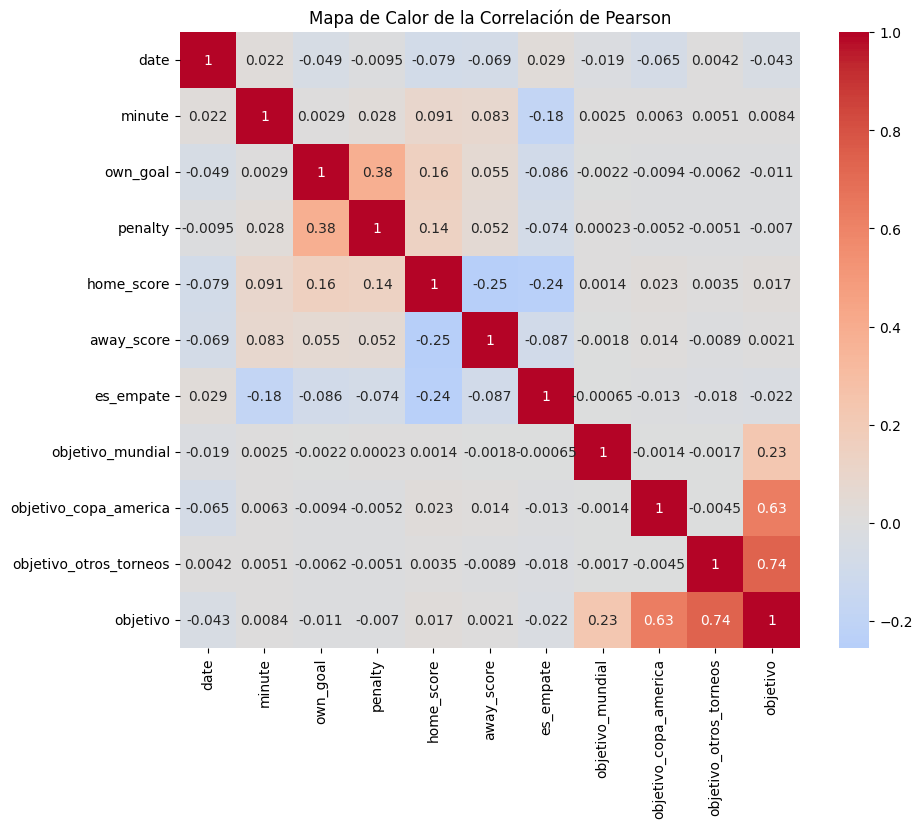

In [279]:
# Crear mapas de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Mapa de Calor de la Correlación de Pearson")
plt.show()

COMENTARIO MATRIZ DE CORRELACION

La matriz La sugiere que algunos eventos en un partido de fútbol están relacionados. Por ejemplo, los penales y los autogoles parecen estar conectados de alguna manera.

Efecto del resultado: El resultado del partido (empate, victoria local o visitante) tiene una fuerte influencia en otras variables como el número de goles.

Valores cercanos a -1:

Es empate y home score: Tienen una correlación negativa fuerte. Cuando hay un empate, tanto el equipo local como el visitante tienden a tener menos goles.

Valores cercanos a 0:

Fecha y la mayoría de las otras variables: La correlación es muy baja, lo que indica que la fecha del partido no está fuertemente relacionada con las otras variables.

Creacion de variable objetivo:

Las variables creadas tienen un fuerte correlacion entre ellas, las mas fuertes son donde Chile tuvo una buena participacion ganado el torneo (objetivo Copa Amercia, objetivo otros torneos).

Nuestra variable objetivo tiene una correlacion es positiva pero moderada con la variable creada objetivo mundial (0.23),esta correlacion se debe al tercer lugar de Chile en el mundial de 1962